In [27]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [28]:
#Data Exploration
music = pd.read_csv('music_dataset_mod.csv')
music.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


In [29]:
music_copy = music.copy()
music_copy.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


In [30]:
music_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [31]:
music_copy.describe()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,121.177891,46.684324,51.741685,54.854619,58.442054,48.813244,54.421479,76.646294,47.462577,47.319735,50.858454,49.328441
std,19.600614,17.809545,29.008872,29.489650,29.650752,33.239190,29.606431,18.867990,32.492813,32.274932,29.419584,29.140840
min,50.494818,-4.165724,0.408370,0.598517,0.217449,-29.990605,0.146433,18.995222,0.047202,0.000000,0.008879,0.254396
25%,107.885045,34.252531,26.635663,29.782438,32.240968,22.331010,29.603967,62.916792,11.678634,14.422842,24.832718,23.605648
50%,121.356455,46.390854,52.245242,54.926936,59.366659,49.871999,54.618441,75.739758,52.994852,50.722858,52.400507,50.106840
75%,135.054584,58.481545,76.919814,79.438614,82.872727,75.133776,78.502328,89.973436,75.149865,75.673932,77.304355,75.550700
max,175.982637,104.932942,109.643123,114.949678,119.991892,119.728293,119.699889,140.031079,99.586429,100.000000,99.820903,99.958673


In [32]:
music_copy["Genre"].value_counts()

,count
Genre,
Rock,190
Jazz,190
Country,180
Hip-hop,168
Classical,162


In [33]:
music_copy["Genre"].unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

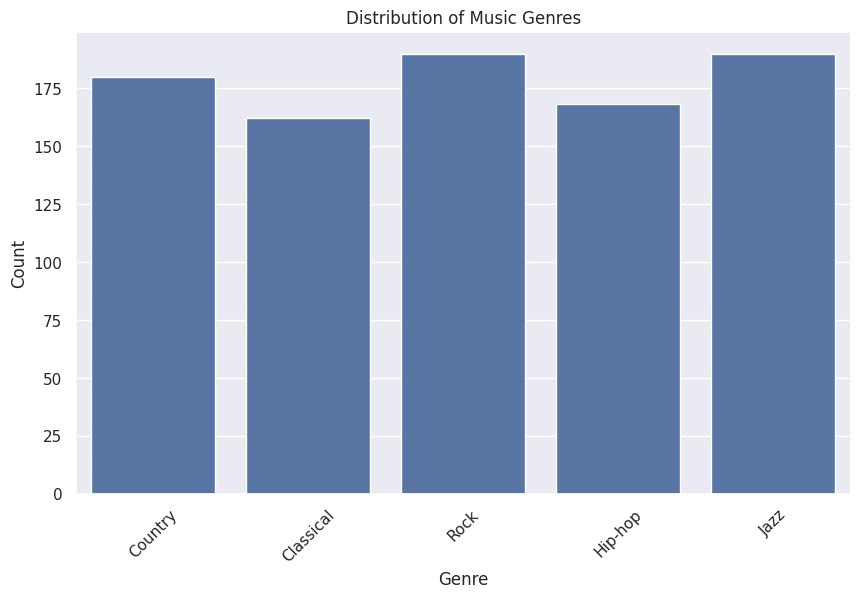

In [34]:
plt.figure(figsize = (10, 6))
sns.countplot(x = "Genre", data = music_copy)
plt.title("Distribution of Music Genres")
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

In [35]:
#Correlation Analysis
music_copy_cleaned = music_copy.dropna()
music_copy_cleaned.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


In [36]:
#Splitting data into features and target

x = music_copy_cleaned.drop(columns = ["Genre"])
y = music_copy_cleaned["Genre"]

In [37]:
#Encode the Target - transforming the categorical genres into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [38]:
#updating the data set with encoded genre
music_copy_encoded = music_copy_cleaned.copy()
music_copy_encoded.drop(columns = ["Genre"], inplace = True)
music_copy_encoded["Genre_encoded"] = y_encoded
music_copy_encoded.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre_encoded
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,1
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,0
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,4
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,2
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,1


In [39]:
#correlation matrix
correlation_matrix = music_copy_encoded.corr()
correlation_matrix

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre_encoded
Tempo,1.000000,-0.019799,0.019506,0.041447,-0.074421,0.009629,0.018964,0.389400,0.040765,0.033752,0.039567,-0.038901,0.113906
Dynamics Range,-0.019799,1.000000,0.026418,-0.037116,0.127534,-0.204273,0.047814,-0.008319,-0.373529,-0.364005,-0.014778,0.015526,-0.462600
Vocal Presence,0.019506,0.026418,1.000000,0.012152,-0.056417,0.001731,0.041511,0.071056,0.005659,0.012855,0.041722,-0.053142,-0.005501
Percussion Strength,0.041447,-0.037116,0.012152,1.000000,-0.028638,-0.009360,-0.042843,0.524573,0.099178,0.089557,0.007340,0.024592,0.146171
String Instrument Detection,-0.074421,0.127534,-0.056417,-0.028638,1.000000,-0.106855,-0.091424,-0.076020,-0.133776,-0.136804,-0.018462,-0.003055,-0.185088
Electronic Element Presence,0.009629,-0.204273,0.001731,-0.009360,-0.106855,1.000000,0.060110,0.050346,0.211896,0.189693,0.044057,-0.045359,0.232907
Rhythm Complexity,0.018964,0.047814,0.041511,-0.042843,-0.091424,0.060110,1.000000,0.536786,0.030144,0.019255,0.003887,-0.000664,0.095718
Drums Influence,0.389400,-0.008319,0.071056,0.524573,-0.076020,0.050346,0.536786,1.000000,0.084165,0.067735,0.036744,-0.010554,0.169501
Distorted Guitar,0.040765,-0.373529,0.005659,0.099178,-0.133776,0.211896,0.030144,0.084165,1.000000,0.965909,0.012582,-0.057392,0.607291
Metal Frequencies,0.033752,-0.364005,0.012855,0.089557,-0.136804,0.189693,0.019255,0.067735,0.965909,1.000000,0.025294,-0.061390,0.582498


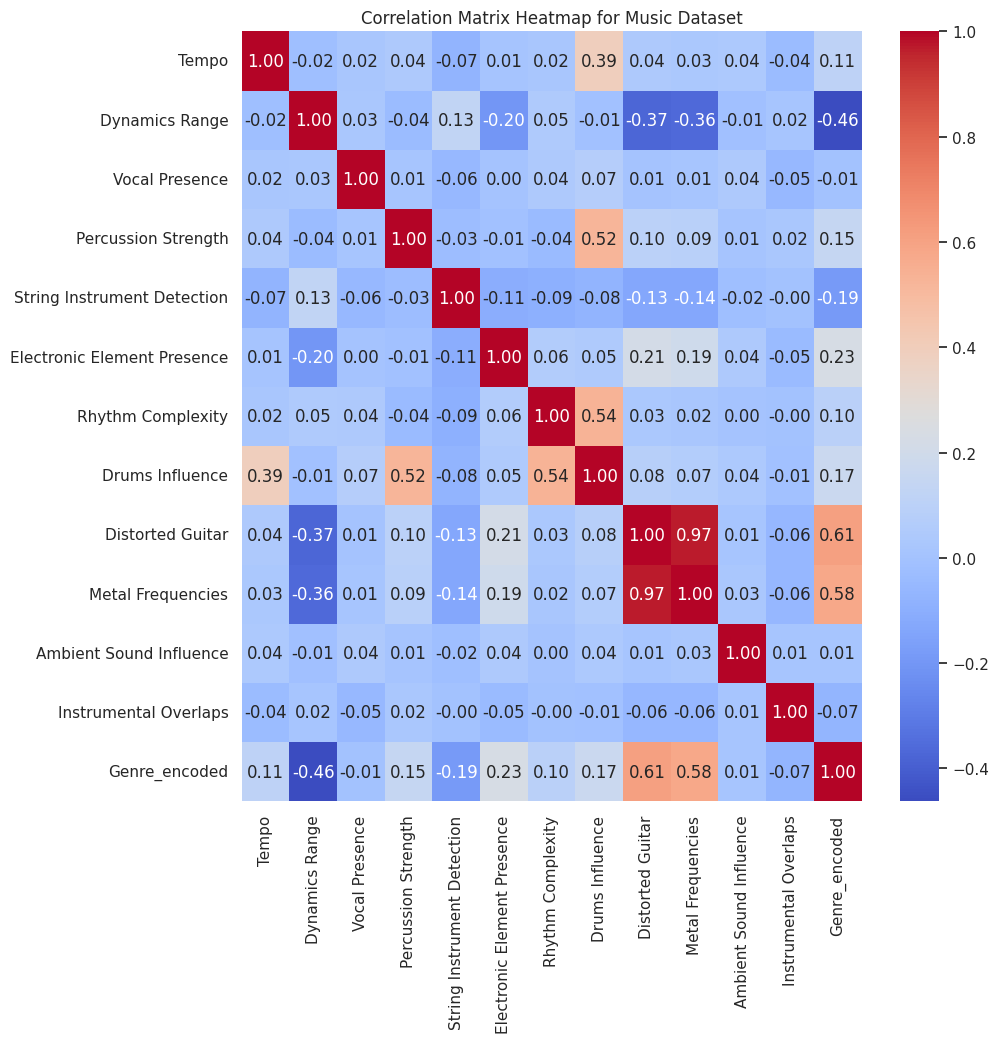

In [40]:
plt.figure(figsize = (10, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Matrix Heatmap for Music Dataset")
plt.show()

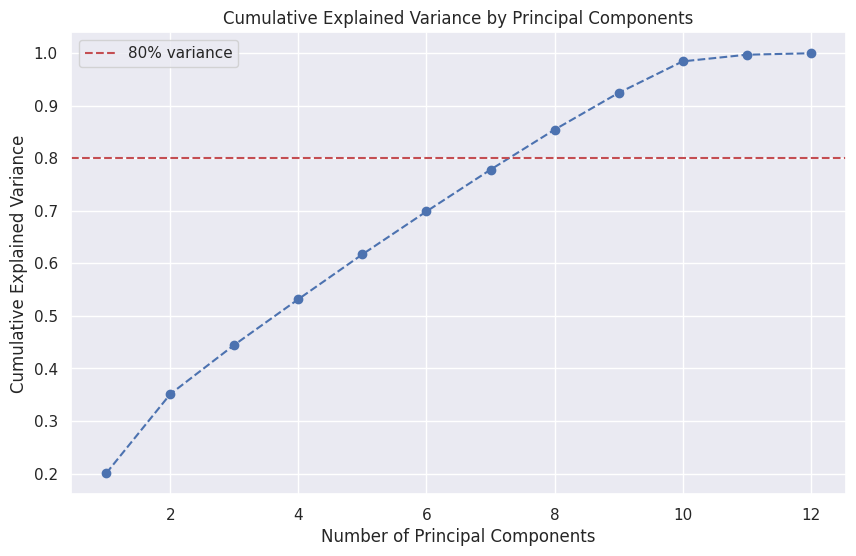

Shape of the reduced dataset: (890, 8)


In [41]:
#PCA for Dimensionality Reduction

#standardize the dataset
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#applying pca
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

#analyzing varience
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by Principal Components")
plt.axhline(y=0.80, color='r', linestyle='--', label='80% variance')
plt.legend()
plt.grid(True)
plt.show()


#deciding on the number of components
#optimal_componets = np.argmax(cumulative_variance >= 0.80) + 1
#print(f"Optimal number of componets to retain 80% variance: {optimal_componets}")

#reapplying PCA with choosen number of components
#pca = PCA(n_components = optimal_componets)
pca = PCA(n_components = 8)
x_pca = pca.fit_transform(x_scaled)

print("Shape of the reduced dataset:", x_pca.shape)

In [42]:
#Evaluating Classification Efficacy - PCA - Transformed vs Original Data

x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y_encoded, test_size = 0.3, random_state = 42)

log_reg_pca = LogisticRegression(max_iter = 10000)
log_reg_pca.fit(x_train_pca, y_train_pca)

y_pred_pca = log_reg_pca.predict(x_test_pca)
pca_accuracy = accuracy_score(y_test_pca, y_pred_pca)
pca_classification_report = classification_report(y_test_pca, y_pred_pca, target_names = label_encoder.classes_)

print("PCA-Transformed Data:")
print("Accuracy:", pca_accuracy)
print("Classification Report:\n", pca_classification_report)

x_train_original, x_test_original, y_train_original, y_test_original = train_test_split(x_scaled, y_encoded, test_size = 0.3, random_state = 42)

log_reg_original = LogisticRegression(max_iter = 10000)
log_reg_original.fit(x_train_original, y_train_original)

y_pred_original = log_reg_original.predict(x_test_original)
original_accuracy = accuracy_score(y_test_original, y_pred_original)
original_classification_report = classification_report(y_test_original, y_pred_original, target_names = label_encoder.classes_)


print("\nOriginal Data:")
print("Accuracy:", original_accuracy)
print("Classification Report:\n", original_classification_report)


PCA-Transformed Data:
Accuracy: 0.5355805243445693
Classification Report:
               precision    recall  f1-score   support

   Classical       0.89      0.98      0.93        51
     Country       0.32      0.23      0.27        52
     Hip-hop       0.49      0.44      0.46        48
        Jazz       0.41      0.42      0.42        62
        Rock       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267


Original Data:
Accuracy: 0.5318352059925093
Classification Report:
               precision    recall  f1-score   support

   Classical       0.86      1.00      0.93        51
     Country       0.33      0.25      0.29        52
     Hip-hop       0.45      0.46      0.45        48
        Jazz       0.44      0.39      0.41        62
        Rock       0.49      0.59      0.54        54

    accuracy                           0.

In [43]:
music_copy.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


In [44]:
#Genre Prediction and Integration

#music_copy.head()

unknown_genre_data = music_copy[music_copy["Genre"].isnull()]

unknown_genre_data.head()

x_unknown = unknown_genre_data.drop(columns = ["Genre"])


x_unknown_scaled = scaler.transform(x_unknown)
x_unknown_pca = pca.transform(x_unknown_scaled)

y_unknown_pred = log_reg_pca.predict(x_unknown_pca)

unknown_genre_data.loc[:, 'Predicted_Genre'] = label_encoder.inverse_transform(y_unknown_pred)

print(unknown_genre_data[["Predicted_Genre"]])

unknown_genre_data.head()


    Predicted_Genre
13        Classical
18          Country
22          Country
31             Rock
42             Rock
..              ...
991         Hip-hop
992            Rock
993         Hip-hop
994         Hip-hop
995       Classical

[110 rows x 1 columns]


<ipython-input-44-1535546b28a0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_genre_data.loc[:, 'Predicted_Genre'] = label_encoder.inverse_transform(y_unknown_pred)


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre,Predicted_Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN,Classical
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN,Country
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN,Country
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN,Rock
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN,Rock
